<a href="https://colab.research.google.com/github/birdenly/network_analysis/blob/main/U2_Atividade_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Analysis with NetworkX / Parte 1

Network Analysis with networkX using the dataset: https://www.kaggle.com/datasets/tamber/steam-video-games?resource=download

### *Steam Video Games*

<blockquote class="epigraph" style=" padding: 10px">

Steam is the world's most popular PC Gaming hub, with over 6,000 games and a community of millions of gamers. With a massive collection that includes everything from AAA blockbusters to small indie titles, great discovery tools are a highly valuable asset for Steam.
</blockquote>

## Network Basics

## Install NetworkX

In [3]:
!pip install networkx

## Import Libraries

In [2]:
import networkx
import pandas as pd
#pd.set_option('max_rows', 400)
import matplotlib.pyplot as plt

## *Steam Games* Network

The network data that we're going to use in this lesson is taken from Andrew Beveridge and Jie Shan's paper, ["Network of Thrones."](https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20%281%29.pdf)

These researchers calculated how many times each Game of Thrones character appeared within 15 words of another character in *A Storm of Swords*, the third book in the series.

| Network Element      | Steam |         
| :-------------: |:-------------:|
| Node    | steamID/Games |
| Edge     | Plays the same game      |
| Float | Decimal Numbers      |  
| Boolean | True/False     |   


For example, the following sentence counts as an "edge" or connection between User1 and User2:

User1 and User2 purcharsed and played Elden Ring

:::{admonition} Pandas Review
:class: pandasreview
 Do you need a refresher or introduction to the Python data analysis library Pandas? Be sure to check out <a href="https://melaniewalsh.github.io/Intro-Cultural-Analytics/Data-Analysis/Pandas-Basics-Part1.html"> Pandas Basics (1-3) </a> in this textbook!
:::

In [40]:
steam = pd.read_csv("/content/drive/MyDrive/steam-200k.csv", header = None, names=["Player_ID", "Game_title", "Behavior", "Hours", "Ignore"],nrows=5000)
steam['Behavior'] = steam['Behavior'].map({'purchase': 1, 'play': 0})
steam.head(5)

Player_ID                  Game_title  Behavior  Hours  Ignore
0  151603712  The Elder Scrolls V Skyrim         1    1.0       0
1  151603712  The Elder Scrolls V Skyrim         0  273.0       0
2  151603712                   Fallout 4         1    1.0       0
3  151603712                   Fallout 4         0   87.0       0
4  151603712                       Spore         1    1.0       0

In [41]:
steam

Player_ID                       Game_title  Behavior  Hours  Ignore
0     151603712       The Elder Scrolls V Skyrim         1    1.0       0
1     151603712       The Elder Scrolls V Skyrim         0  273.0       0
2     151603712                        Fallout 4         1    1.0       0
3     151603712                        Fallout 4         0   87.0       0
4     151603712                            Spore         1    1.0       0
...         ...                              ...       ...    ...     ...
4995  136021775                      Neverwinter         0  140.0       0
4996  136021775                      Garry's Mod         1    1.0       0
4997  136021775                      Garry's Mod         0   19.6       0
4998  136021775  Counter-Strike Global Offensive         1    1.0       0
4999  136021775  Counter-Strike Global Offensive         0   15.9       0

[5000 rows x 5 columns]

## Create a Network From a Pandas DataFrame

In [42]:
G = networkx.from_pandas_edgelist(steam, source='Player_ID', target='Game_title', edge_attr='Behavior')

## Output a Network File

In [43]:
networkx.write_graphml(G, 'steam.graphml')

## Draw a Simple Network

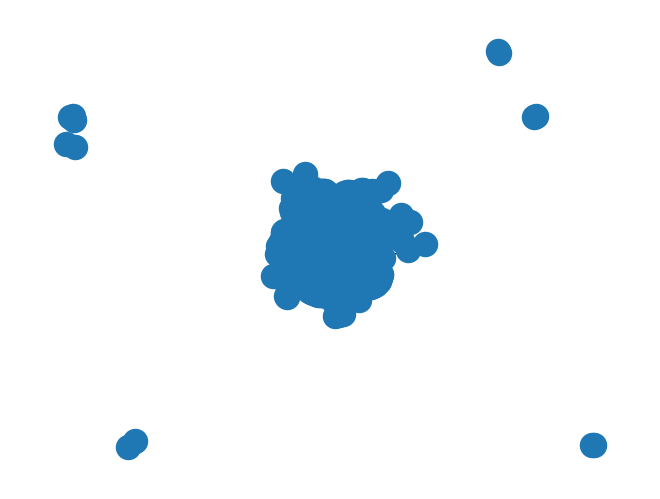

In [44]:
networkx.draw(G)

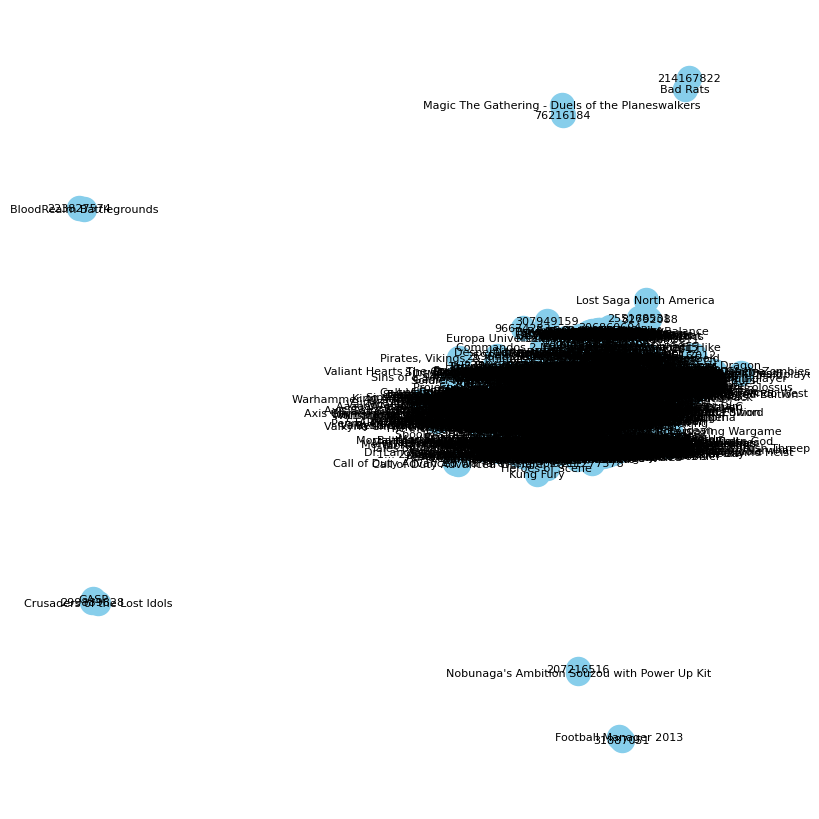

In [45]:
plt.figure(figsize=(8,8))
networkx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)

## Calculate Degree

Who has the most number of connections in the network?

In [46]:
networkx.degree(G)

DegreeView({151603712: 40, 'The Elder Scrolls V Skyrim': 21, 'Fallout 4': 2, 'Spore': 2, 'Fallout New Vegas': 8, 'Left 4 Dead 2': 16, 'HuniePop': 1, 'Path of Exile': 7, 'Poly Bridge': 1, 'Left 4 Dead': 9, 'Team Fortress 2': 45, 'Tomb Raider': 8, 'The Banner Saga': 2, 'Dead Island Epidemic': 8, 'BioShock Infinite': 6, 'Dragon Age Origins - Ultimate Edition': 4, 'Fallout 3 - Game of the Year Edition': 5, 'SEGA Genesis & Mega Drive Classics': 2, 'Grand Theft Auto IV': 5, 'Realm of the Mad God': 5, 'Marvel Heroes 2015': 11, 'Eldevin': 1, 'Dota 2': 113, 'BioShock': 6, 'Robocraft': 15, "Garry's Mod": 21, 'Jazzpunk': 2, 'Alan Wake': 6, 'BioShock 2': 6, 'Fallen Earth': 2, "Fallout New Vegas Courier's Stash": 7, 'Fallout New Vegas Dead Money': 7, 'Fallout New Vegas Honest Hearts': 7, 'Grand Theft Auto Episodes from Liberty City': 4, 'Hitman Absolution': 8, 'HuniePop Official Digital Art Collection': 1, 'HuniePop Original Soundtrack': 1, 'The Banner Saga - Mod Content': 2, 'The Elder Scrolls V S

Make the degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [47]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

Make a Pandas dataframe from the degree data `G.nodes(data='degree')`, then sort from highest to lowest

In [48]:
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

node  degree
78                               53875128     505
772                              11373749     455
1440                              9823354     187
1147                             56038151     174
680                              65117175     127
...                                   ...     ...
856         YOU DON'T KNOW JACK Vol. 1 XL       1
857                          Port of Call       1
858                           LEGO Worlds       1
859                            Zeno Clash       1
840   Sam & Max 104 Abe Lincoln Must Die!       1

[1681 rows x 2 columns]

Plot the nodes with the highest degree values

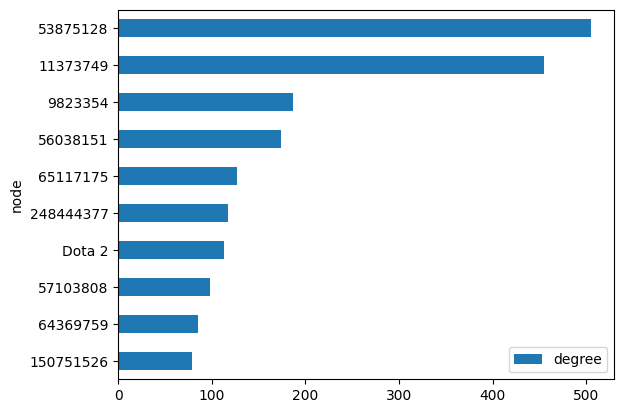

In [49]:
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh').invert_yaxis()

## Calculate Weighted Degree

Who has the most number of connections in the network (if you factor in edge weight)?

In [50]:
networkx.degree(G, weight='Weight')

DegreeView({151603712: 40, 'The Elder Scrolls V Skyrim': 21, 'Fallout 4': 2, 'Spore': 2, 'Fallout New Vegas': 8, 'Left 4 Dead 2': 16, 'HuniePop': 1, 'Path of Exile': 7, 'Poly Bridge': 1, 'Left 4 Dead': 9, 'Team Fortress 2': 45, 'Tomb Raider': 8, 'The Banner Saga': 2, 'Dead Island Epidemic': 8, 'BioShock Infinite': 6, 'Dragon Age Origins - Ultimate Edition': 4, 'Fallout 3 - Game of the Year Edition': 5, 'SEGA Genesis & Mega Drive Classics': 2, 'Grand Theft Auto IV': 5, 'Realm of the Mad God': 5, 'Marvel Heroes 2015': 11, 'Eldevin': 1, 'Dota 2': 113, 'BioShock': 6, 'Robocraft': 15, "Garry's Mod": 21, 'Jazzpunk': 2, 'Alan Wake': 6, 'BioShock 2': 6, 'Fallen Earth': 2, "Fallout New Vegas Courier's Stash": 7, 'Fallout New Vegas Dead Money': 7, 'Fallout New Vegas Honest Hearts': 7, 'Grand Theft Auto Episodes from Liberty City': 4, 'Hitman Absolution': 8, 'HuniePop Official Digital Art Collection': 1, 'HuniePop Original Soundtrack': 1, 'The Banner Saga - Mod Content': 2, 'The Elder Scrolls V S

Make the weighted degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [51]:
weighted_degrees = dict(networkx.degree(G, weight='Weight'))
networkx.set_node_attributes(G, name='weighted_degree', values=weighted_degrees)

Make a Pandas dataframe from the degree data `G.nodes(data='weighted_degree')`, then sort from highest to lowest

In [52]:
weighted_degree_df = pd.DataFrame(G.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df

node  weighted_degree
78                               53875128              505
772                              11373749              455
1440                              9823354              187
1147                             56038151              174
680                              65117175              127
...                                   ...              ...
856         YOU DON'T KNOW JACK Vol. 1 XL                1
857                          Port of Call                1
858                           LEGO Worlds                1
859                            Zeno Clash                1
840   Sam & Max 104 Abe Lincoln Must Die!                1

[1681 rows x 2 columns]

Plot the nodes with the highest weighted degree values

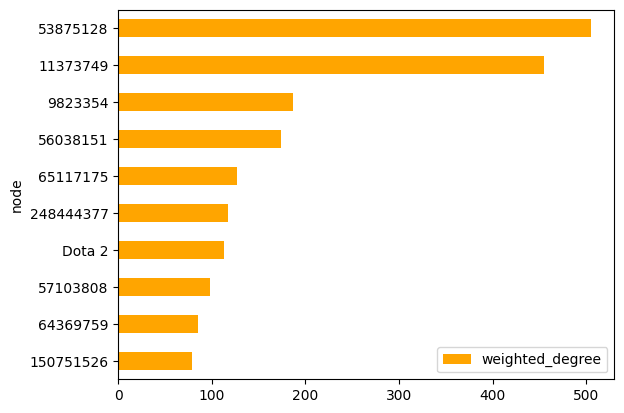

In [53]:
num_nodes_to_inspect = 10
weighted_degree_df[:num_nodes_to_inspect].plot(x='node', y='weighted_degree', color='orange', kind='barh').invert_yaxis()

## Calculate Betweenness Centrality Scores

Who connects the most other nodes in the network?

In [54]:
networkx.betweenness_centrality(G)

{151603712: 0.016302077473162813,
 'The Elder Scrolls V Skyrim': 0.017315518665379618,
 'Fallout 4': 0.00016575080288059398,
 'Spore': 0.00017084293614865213,
 'Fallout New Vegas': 0.003022050685864951,
 'Left 4 Dead 2': 0.013115725781384079,
 'HuniePop': 0.0,
 'Path of Exile': 0.0021290863253499606,
 'Poly Bridge': 0.0,
 'Left 4 Dead': 0.0031395788993403718,
 'Team Fortress 2': 0.043985617054736956,
 'Tomb Raider': 0.007455028068229856,
 'The Banner Saga': 0.00017084293614865213,
 'Dead Island Epidemic': 0.0032285024329055806,
 'BioShock Infinite': 0.002294963388245371,
 'Dragon Age Origins - Ultimate Edition': 0.0009352749433197354,
 'Fallout 3 - Game of the Year Edition': 0.0011290324476503698,
 'SEGA Genesis & Mega Drive Classics': 4.772002957622559e-05,
 'Grand Theft Auto IV': 0.002617787561879913,
 'Realm of the Mad God': 0.0008006916631731793,
 'Marvel Heroes 2015': 0.004791768137414035,
 'Eldevin': 0.0,
 'Dota 2': 0.11907756764564761,
 'BioShock': 0.002815092132728351,
 'Robocr

In [55]:
betweenness_centrality = networkx.betweenness_centrality(G)

Add `betweenness_centrality` (which is already a dictionary) as a network "attribute" with `networkx.set_node_attributes()`

In [56]:
networkx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)

Make a Pandas dataframe from the betweenness data `G.nodes(data='betweenness')`, then sort from highest to lowest

In [57]:
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

node  betweenness
78                               53875128     0.365048
772                              11373749     0.356585
22                                 Dota 2     0.119078
1440                              9823354     0.103853
1329                            248444377     0.089039
...                                   ...          ...
970                     The Dream Machine     0.000000
971           The Dream Machine Chapter 3     0.000000
972           The Dream Machine Chapter 4     0.000000
973           The Dream Machine Chapter 5     0.000000
840   Sam & Max 104 Abe Lincoln Must Die!     0.000000

[1681 rows x 2 columns]

Plot the nodes with the highest betweenness centrality scores

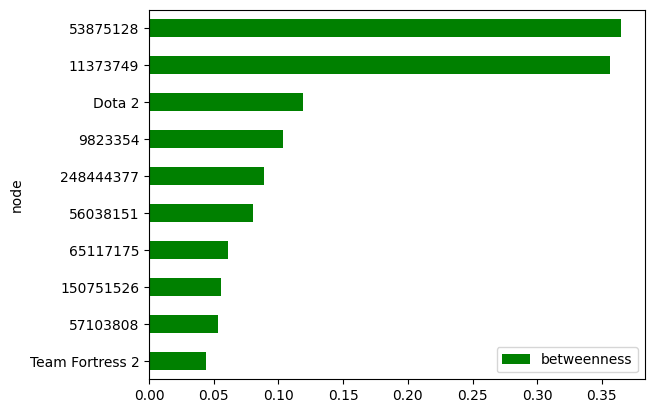

In [59]:
num_nodes_to_inspect = 10
betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='green', kind='barh').invert_yaxis()

## Communities

Who forms distinct communities within this network?

In [63]:
from networkx.algorithms import community

Calculate communities with `community.greedy_modularity_communities()`

In [76]:
communities = community.greedy_modularity_communities(G, weight="Behavior")

In [77]:
communities

[frozenset({'(0, "Alan Wake\'s American Nightmare")',
            '(0, "Assassin\'s Creed Brotherhood")',
            '(0, "Assassin\'s Creed III")',
            '(0, "Borderlands DLC Mad Moxxi\'s Underdome Riot")',
            '(0, "Broken Sword 5 - the Serpent\'s Curse")',
            '(0, "Deus Ex Human Revolution - Director\'s Cut")',
            '(0, "MacGuffin\'s Curse")',
            '(0, "Organ Trail Director\'s Cut")',
            '(0, "The Bard\'s Tale")',
            '(0, "Tom Clancy\'s Splinter Cell Conviction")',
            '(0, "YOU DON\'T KNOW JACK HEADRUSH")',
            '(0, "YOU DON\'T KNOW JACK MOVIES")',
            '(0, "YOU DON\'T KNOW JACK SPORTS")',
            '(0, "YOU DON\'T KNOW JACK TELEVISION")',
            '(0, "YOU DON\'T KNOW JACK Vol. 1 XL")',
            '(0, "YOU DON\'T KNOW JACK Vol. 2")',
            '(0, "YOU DON\'T KNOW JACK Vol. 3")',
            '(0, "YOU DON\'T KNOW JACK Vol. 4 The Ride")',
            "(0, '4 Elements')",
            "(0, 

Make a `dict`ionary by looping through the communities and, for each member of the community, adding their community number

In [78]:
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

Add modularity class to the network as an attribute

In [79]:
networkx.set_node_attributes(G, modularity_class, 'modularity_class')

Make a Pandas dataframe from modularity class network data `G.nodes(data='modularity_class')`

In [96]:
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)

In [81]:
communities_df

node  modularity_class
1600                                     (0, 207216516)                27
1601  (0, "Nobunaga's Ambition Souzou with Power Up ...                27
1594                                      (0, 76216184)                26
1595  (0, 'Magic The Gathering - Duels of the Planes...                26
1571                                     (0, 237047627)                25
...                                                 ...               ...
806                      (0, 'Trials 2 Second Edition')                 0
807              (0, 'Grim Legends The Forsaken Bride')                 0
808   (0, 'Nightmares from the Deep 2 The Siren`s Ca...                 0
809   (0, 'Tales of Monkey Island Chapter 2 - The Si...                 0
840          (0, 'Sam & Max 104 Abe Lincoln Must Die!')                 0

[1681 rows x 2 columns]

Inspect each community in the network

In [87]:
communities_df[communities_df['modularity_class'] == 27]

node  modularity_class
1600                                     (0, 207216516)                27
1601  (0, "Nobunaga's Ambition Souzou with Power Up ...                27

In [88]:
communities_df[communities_df['modularity_class'] == 10]

node  modularity_class
1578                  (0, 'Cubic Castles')                10
563            (0, 'ARK Survival Evolved')                10
562                         (0, 297811211)                10
88                        (0, 'Far Cry 4')                10
87                    (0, 'Rocket League')                10
253             (0, 'BattleBlock Theater')                10
1577                        (0, 170491009)                10
1579     (0, 'Call of Duty Black Ops III')                10
1140           (0, 'Starbound - Unstable')                10
1581                  (0, 'Trials Fusion')                10
1435                        (0, 210778610)                10
1663                        (0, 303326013)                10
1043                     (0, 'Quake Live')                10
1644                        (0, 'WARMODE')                10
1643                        (0, 130280718)                10
1293      (0, 'Primal Carnage Extinction')                10
1510                        (0, 180789959)                10
1511  (0, 'Skyrim Script Extender (SKSE)')                10
1292                        (0, 248613483)                10
1580         (0, 'Double Action Boogaloo')                10
1256                         (0, 'Verdun')                10
176                  (0, 'Turbo Dismount')                10
1240                        (0, 287061478)                10
1138                   (0, 'PlanetSide 2')                10
1617                        (0, 'AirMech')                10
1137                      (0, 'Starbound')                10

In [89]:
communities_df[communities_df['modularity_class'] == 2]

node  modularity_class
1558                      (0, 'Lords Of The Fallen')                 2
1560                               (0, 'Space Hulk')                 2
1659                    (0, 'Football Manager 2012')                 2
1184                         (0, 'Grand Theft Auto')                 2
1179                              (0, 'Crysis Wars')                 2
...                                              ...               ...
43                    (0, 'Ultra Street Fighter IV')                 2
51                           (0, 'Orcs Must Die! 2')                 2
40    (0, 'The Elder Scrolls V Skyrim - Hearthfire')                 2
560                                    (0, 63024728)                 2
61                        (0, "Assassin's Creed II")                 2

[197 rows x 2 columns]

In [90]:
communities_df[communities_df['modularity_class'] == 1]

node  modularity_class
470                      (0, 'Shadowgrounds Survivor')                 1
460               (0, 'resident evil 4 / biohazard 4')                 1
471       (0, "Shadowrun Dragonfall - Director's Cut")                 1
523                 (0, 'Titan Quest Immortal Throne')                 1
462  (0, 'Resident Evil Revelations / Biohazard Rev...                 1
..                                                 ...               ...
237                                     (0, 'Outlast')                 1
274  (0, 'Call of Duty Modern Warfare 2 - Multiplay...                 1
234                               (0, 'Strike Vector')                 1
239          (0, 'WRC 4 FIA WORLD RALLY CHAMPIONSHIP')                 1
240                         (0, 'Valkyria Chronicles')                 1

[302 rows x 2 columns]

In [91]:
communities_df[communities_df['modularity_class'] == 0]

node  modularity_class
1416                                 (0, 'Magic 2014 ')                 0
121                                   (0, 'Metro 2033')                 0
1587                         (0, 'Kentucky Route Zero')                 0
117            (0, 'Batman Arkham Asylum GOTY Edition')                 0
1417                       (0, 'Gotham City Impostors')                 0
...                                                 ...               ...
806                      (0, 'Trials 2 Second Edition')                 0
807              (0, 'Grim Legends The Forsaken Bride')                 0
808   (0, 'Nightmares from the Deep 2 The Siren`s Ca...                 0
809   (0, 'Tales of Monkey Island Chapter 2 - The Si...                 0
840          (0, 'Sam & Max 104 Abe Lincoln Must Die!')                 0

[362 rows x 2 columns]

Plot a sample of 40 characters with their modularity class indicated by a star

In [92]:
import seaborn as sns

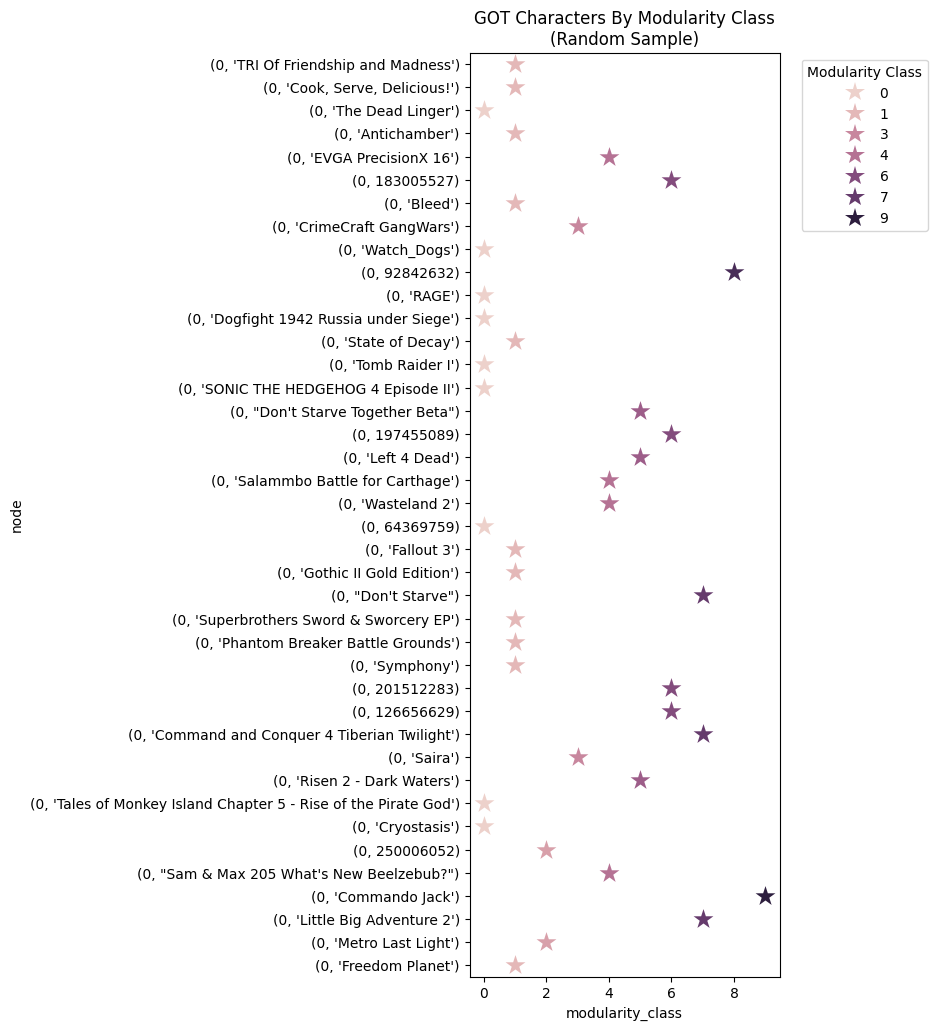

In [93]:
#Set figure size
plt.figure(figsize=(4,12))

#Plot a categorical scatter plot from the dataframe communities_df.sample(40)
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(40),
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Steam data By Modularity Class\n(Random Sample)")
plt.show()

Plot all GOT characters with their modularity class indicated by a star (tak

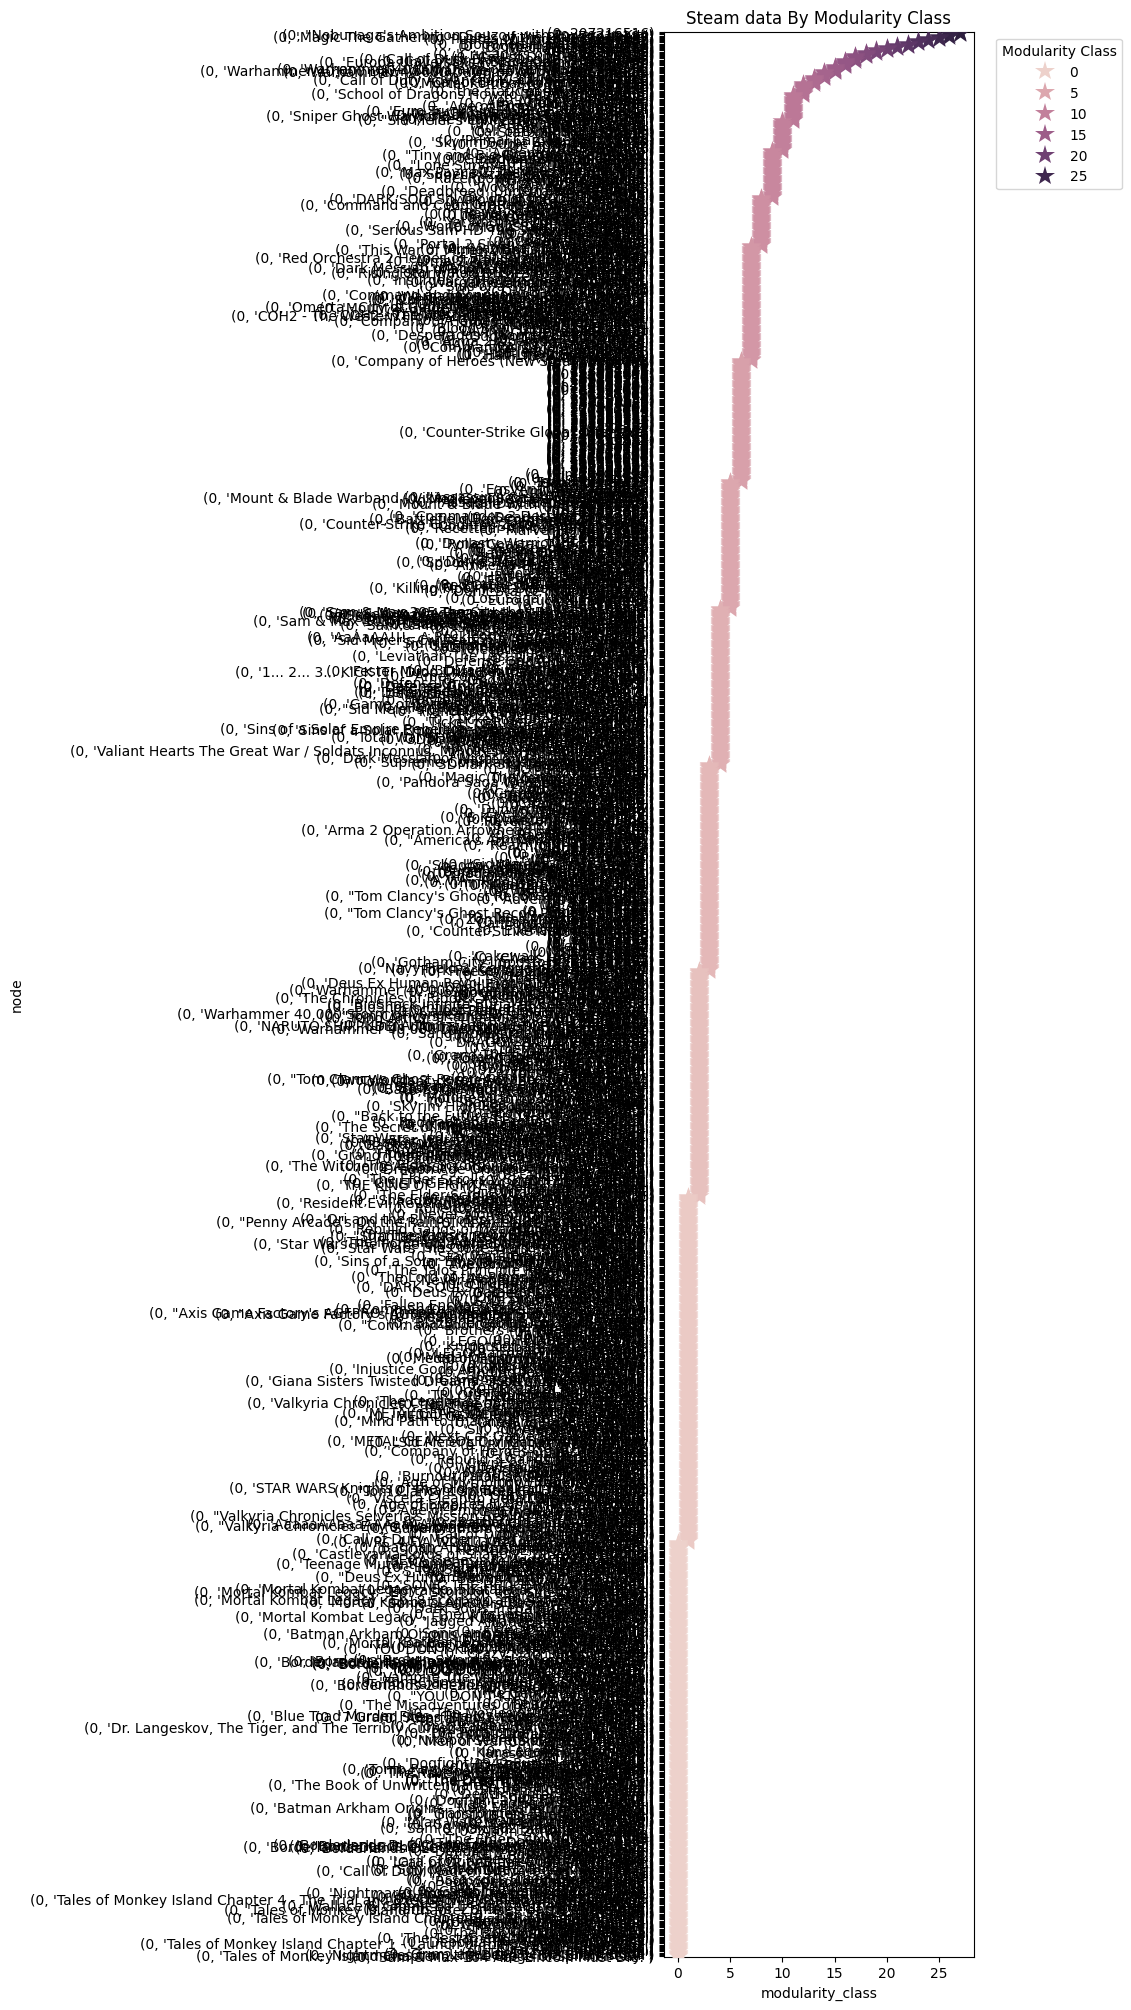

In [99]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Steam data By Modularity Class")
plt.show()

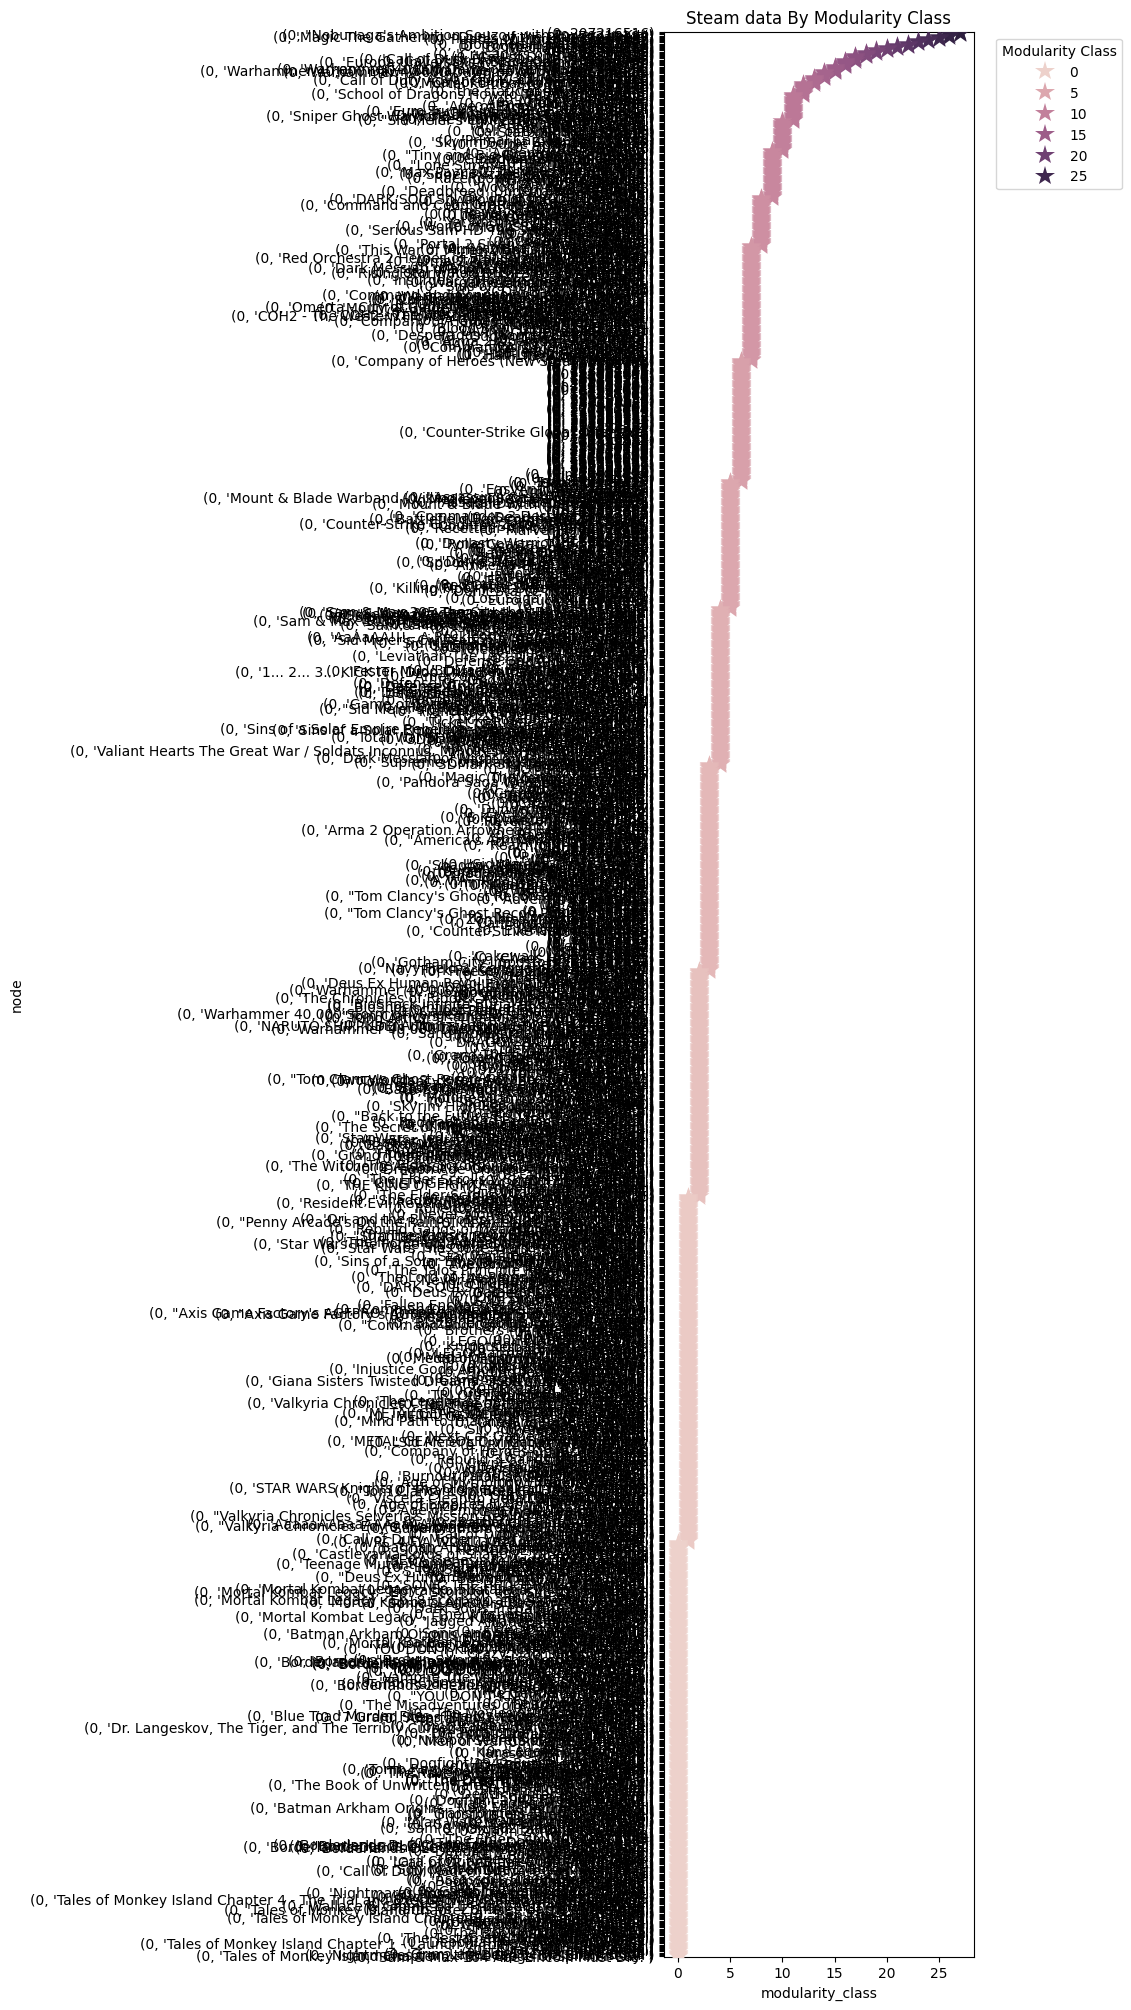

In [100]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Steam data By Modularity Class")
plt.show()

## All Network Metrics

Create a Pandas dataframe of all network attributes by creating a `dict`ionary of `G.nodes(data=True)`...

In [101]:
dict(G.nodes(data=True))

{'(0, 151603712)': {'degree': 40,
  'weighted_degree': 40,
  'betweenness': 0.016302077473162813,
  'modularity_class': 2},
 "(0, 'The Elder Scrolls V Skyrim')": {'degree': 21,
  'weighted_degree': 21,
  'betweenness': 0.017315518665379618,
  'modularity_class': 1},
 "(0, 'Fallout 4')": {'degree': 2,
  'weighted_degree': 2,
  'betweenness': 0.00016575080288059398,
  'modularity_class': 2},
 "(0, 'Spore')": {'degree': 2,
  'weighted_degree': 2,
  'betweenness': 0.00017084293614865213,
  'modularity_class': 2},
 "(0, 'Fallout New Vegas')": {'degree': 8,
  'weighted_degree': 8,
  'betweenness': 0.003022050685864951,
  'modularity_class': 2},
 "(0, 'Left 4 Dead 2')": {'degree': 16,
  'weighted_degree': 16,
  'betweenness': 0.013115725781384079,
  'modularity_class': 4},
 "(0, 'HuniePop')": {'degree': 1,
  'weighted_degree': 1,
  'betweenness': 0.0,
  'modularity_class': 2},
 "(0, 'Path of Exile')": {'degree': 7,
  'weighted_degree': 7,
  'betweenness': 0.0021290863253499606,
  'modularity_

...and then [transposing it](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.T.html) (flipping the columns and rows) with `.T`

In [102]:
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T
nodes_df

degree  weighted_degree  betweenness  \
(0, 151603712)                       40.0             40.0     0.016302   
(0, 'The Elder Scrolls V Skyrim')    21.0             21.0     0.017316   
(0, 'Fallout 4')                      2.0              2.0     0.000166   
(0, 'Spore')                          2.0              2.0     0.000171   
(0, 'Fallout New Vegas')              8.0              8.0     0.003022   
...                                   ...              ...          ...   
(0, 70165453)                         2.0              2.0     0.001181   
(0, 'F1 2012')                        1.0              1.0     0.000000   
(0, 143693450)                        1.0              1.0     0.000000   
(0, 139955299)                        1.0              1.0     0.000000   
(0, 136021775)                        5.0              5.0     0.000178   

                                   modularity_class  
(0, 151603712)                                  2.0  
(0, 'The Elder Scrolls V Skyrim')               1.0  
(0, 'Fallout 4')                                2.0  
(0, 'Spore')                                    2.0  
(0, 'Fallout New Vegas')                        2.0  
...                                             ...  
(0, 70165453)                                   0.0  
(0, 'F1 2012')                                  0.0  
(0, 143693450)                                  6.0  
(0, 139955299)                                  6.0  
(0, 136021775)                                  6.0  

[1681 rows x 4 columns]

In [103]:
nodes_df.sort_values(by='betweenness', ascending=False)

degree  weighted_degree  \
(0, 53875128)                                505.0            505.0   
(0, 11373749)                                455.0            455.0   
(0, 'Dota 2')                                113.0            113.0   
(0, 9823354)                                 187.0            187.0   
(0, 248444377)                               117.0            117.0   
...                                            ...              ...   
(0, 'The Dream Machine')                       1.0              1.0   
(0, 'The Dream Machine Chapter 3')             1.0              1.0   
(0, 'The Dream Machine Chapter 4')             1.0              1.0   
(0, 'The Dream Machine Chapter 5')             1.0              1.0   
(0, 'Sam & Max 104 Abe Lincoln Must Die!')     1.0              1.0   

                                            betweenness  modularity_class  
(0, 53875128)                                  0.365048               1.0  
(0, 11373749)                                  0.356585               0.0  
(0, 'Dota 2')                                  0.119078               6.0  
(0, 9823354)                                   0.103853               4.0  
(0, 248444377)                                 0.089039               3.0  
...                                                 ...               ...  
(0, 'The Dream Machine')                       0.000000               0.0  
(0, 'The Dream Machine Chapter 3')             0.000000               0.0  
(0, 'The Dream Machine Chapter 4')             0.000000               0.0  
(0, 'The Dream Machine Chapter 5')             0.000000               0.0  
(0, 'Sam & Max 104 Abe Lincoln Must Die!')     0.000000               0.0  

[1681 rows x 4 columns]

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pyvis / Parte 2


In [104]:
!pip install networkx
!pip install pyvis

In [8]:
from pyvis.network import Network
import networkx as nx
G = nx.read_graphml("/content/steam.graphml")
net = Network(notebook=True)
net.from_nx(G)

net.show("steam.html")



steam.html
